## Loan Interest Rate Prediction

### Oleh Triarni Yuni Putri Utami

## Data Exploration 

## **Import Libraries**

In [3]:
#Import Modul Python dan Visualisasi data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


#Import modul untuk modelling dan evaluasi model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from imblearn.metrics import sensitivity_specificity_support
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

In [4]:
#Load dataset
df_train = pd.read_csv('train.csv')
df_train.head()

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
0,10000001,"7,000",< 1 year,Rent,68000.0,not verified,car,18.37,0,NaN,9,14,Female,1
1,10000002,"30,000",4 years,Mortgage,NaN,VERIFIED - income,debt_consolidation,14.93,0,17.0,12,24,Female,3
2,10000003,"24,725",7 years,Mortgage,75566.4,VERIFIED - income source,debt_consolidation,15.88,0,NaN,12,16,Male,3
3,10000004,"16,000",< 1 year,NaN,56160.0,VERIFIED - income source,debt_consolidation,14.34,3,NaN,16,22,Male,3
4,10000005,"17,000",8 years,Own,96000.0,VERIFIED - income source,debt_consolidation,22.17,1,NaN,19,30,Female,1


## **Descriptive Statistics**

In [5]:
#Informasi secara umum tentang dataframe train
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164309 entries, 0 to 164308
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Loan_ID                  164309 non-null  int64  
 1   Loan_Amount_Requested    164309 non-null  object 
 2   Length_Employed          156938 non-null  object 
 3   Home_Owner               138960 non-null  object 
 4   Annual_Income            139207 non-null  float64
 5   Income_Verified          164309 non-null  object 
 6   Purpose_Of_Loan          164309 non-null  object 
 7   Debt_To_Income           164309 non-null  float64
 8   Inquiries_Last_6Mo       164309 non-null  int64  
 9   Months_Since_Deliquency  75930 non-null   float64
 10  Number_Open_Accounts     164309 non-null  int64  
 11  Total_Accounts           164309 non-null  int64  
 12  Gender                   164309 non-null  object 
 13  Interest_Rate            164309 non-null  int64  
dtypes: f

Pengamatan :
1. Data terdiri dari 164309 baris dan 14 kolom.
2. Terdapat beberapa kolom masih memiliki null/missing value (Non-Null Count < jumlah baris) seperti kolom Length_Employed, Home_Owner, Annual_Income, dan Months_Since_Deliquency. 
3. Terlihat bahwa kolom Loan_Amount_Requested seharusnya itu kolom numerik tapi terbaca sebagai data kategorik, sehingga perlu diubah tipe datanya menjadi numerik.

In [6]:
#Merubah kolom Loan_Amount_Requested dari Kategorik ke Numerik
df_train['Loan_Amount_Requested'] = df_train['Loan_Amount_Requested'].str.replace(',','')
df_train['Loan_Amount_Requested'] = pd.to_numeric(df_train['Loan_Amount_Requested'], errors='coerce')

In [7]:
#Check apakah kolom Loan_Amount_Requested sudah berubah menjadi Numerik
df_train['Loan_Amount_Requested'].dtype

dtype('int64')

In [8]:
#mencari kolom yang missing value
df_train.isna().sum()

Loan_ID                        0
Loan_Amount_Requested          0
Length_Employed             7371
Home_Owner                 25349
Annual_Income              25102
Income_Verified                0
Purpose_Of_Loan                0
Debt_To_Income                 0
Inquiries_Last_6Mo             0
Months_Since_Deliquency    88379
Number_Open_Accounts           0
Total_Accounts                 0
Gender                         0
Interest_Rate                  0
dtype: int64

Pengamatan :

Terdapat beberapa kolom masih memiliki null/missing value (Non-Null Count < jumlah baris) seperti kolom Length_Employed, Home_Owner, Annual_Income, dan Months_Since_Deliquency sebagai kolom dengan missing value terbanyak.

In [9]:
#cuplikan data
df_train.sample(10)

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
32636,10032637,3000,3 years,Mortgage,84996.0,not verified,other,11.38,1,44.0,9,23,Male,1
131030,10131031,10000,6 years,Mortgage,69000.0,not verified,debt_consolidation,4.28,0,37.0,9,14,Female,2
25935,10025936,10000,5 years,Own,50000.0,VERIFIED - income source,debt_consolidation,24.84,2,NaN,6,8,Male,3
23617,10023618,2000,4 years,Rent,50000.0,VERIFIED - income source,debt_consolidation,7.97,0,NaN,3,4,Female,3
88043,10088044,12200,4 years,Rent,40800.0,VERIFIED - income,credit_card,22.41,0,NaN,7,12,Male,3
111525,10111526,5000,10+ years,NaN,70000.0,not verified,debt_consolidation,24.14,0,11.0,16,32,Male,2
28495,10028496,10000,10+ years,Mortgage,NaN,VERIFIED - income,debt_consolidation,13.29,5,NaN,6,19,Female,3
129122,10129123,9000,2 years,Mortgage,167000.0,not verified,debt_consolidation,10.10,1,15.0,6,23,Female,1
40719,10040720,10000,10+ years,Rent,63000.0,not verified,debt_consolidation,18.42,3,36.0,10,29,Male,2
110250,10110251,33425,10+ years,NaN,75000.0,VERIFIED - income,credit_card,15.41,0,NaN,6,19,Female,3


Pengamatan :
1. Perlu penyesuaian nama value pada kolom Income_Verified (VERIFIED - income source dan VERIFIED - income).
2. Pada kolom Months_Since_Deliquency dan Annual_Income masih banyak missing value

In [10]:
#Deskripsi statistik
df_train.describe()

,Loan_ID,Loan_Amount_Requested,Annual_Income,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Interest_Rate
count,1.643090e+05,164309.00000,1.392070e+05,164309.000000,164309.000000,75930.000000,164309.000000,164309.000000,164309.000000
mean,1.008216e+07,14349.33692,7.333116e+04,17.207189,0.781698,34.229356,11.193818,25.067665,2.158951
std,4.743207e+04,8281.86870,6.037750e+04,7.845083,1.034747,21.761180,4.991813,11.583067,0.738364
min,1.000000e+07,500.00000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000
25%,1.004108e+07,8000.00000,4.500000e+04,11.370000,0.000000,16.000000,8.000000,17.000000,2.000000
50%,1.008216e+07,12075.00000,6.300000e+04,16.840000,0.000000,31.000000,10.000000,23.000000,2.000000
75%,1.012323e+07,20000.00000,8.869750e+04,22.780000,1.000000,50.000000,14.000000,32.000000,3.000000
max,1.016431e+07,35000.00000,7.500000e+06,39.990000,8.000000,180.000000,76.000000,156.000000,3.000000


Pengamatan :
1. Anomali kolom terjadi pada Annual_Income dan Months_Since_Deliquency dimana data valuenya tidak mencapai baris yang seharusnya (164309)
2. Berdasarkan deskripsi statistik di atas, beberapa kolom memiliki nilai mean yang lebih besar dari median yang berarti distribusinya tidak mendekati normal. Kolom-kolom tersebut adalah Loan_Amount_Requested, Annual_Income, Debt_To_Income, Inquiries_Last_6Mo, Months_Since_Deliquency, Number_Open_Accounts, Total_Accounts, dan Interest_Rate.

## **Statistical Summary**

In [11]:
#pengelompokan kolom berdasarkan jenisnya
cats = []
nums = []

for col in df_train.columns:
    if df_train[col].dtype ==  'O':
        cats.append(col)
    else:
        nums.append(col)

In [12]:
#informasi dari kolom numerik
nums

['Loan_ID',
 'Loan_Amount_Requested',
 'Annual_Income',
 'Debt_To_Income',
 'Inquiries_Last_6Mo',
 'Months_Since_Deliquency',
 'Number_Open_Accounts',
 'Total_Accounts',
 'Interest_Rate']

In [13]:
#Ringkasan deskriptif statistik dari kolom numerik
df_train[nums].describe()

,Loan_ID,Loan_Amount_Requested,Annual_Income,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Interest_Rate
count,1.643090e+05,164309.00000,1.392070e+05,164309.000000,164309.000000,75930.000000,164309.000000,164309.000000,164309.000000
mean,1.008216e+07,14349.33692,7.333116e+04,17.207189,0.781698,34.229356,11.193818,25.067665,2.158951
std,4.743207e+04,8281.86870,6.037750e+04,7.845083,1.034747,21.761180,4.991813,11.583067,0.738364
min,1.000000e+07,500.00000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000
25%,1.004108e+07,8000.00000,4.500000e+04,11.370000,0.000000,16.000000,8.000000,17.000000,2.000000
50%,1.008216e+07,12075.00000,6.300000e+04,16.840000,0.000000,31.000000,10.000000,23.000000,2.000000
75%,1.012323e+07,20000.00000,8.869750e+04,22.780000,1.000000,50.000000,14.000000,32.000000,3.000000
max,1.016431e+07,35000.00000,7.500000e+06,39.990000,8.000000,180.000000,76.000000,156.000000,3.000000


Pengamatan  : 
1. Kolom Loan_ID, Debt_To_Income, dan Interest_Rate sudah cukup simetrik distribusinya karena nilai mean dan median tidak berbeda jauh satu sama lain.
2. Kolom Loan_Amount_Requested, Annual_Income, Inquiries_Last_6Mo, Months_Since_Deliquency, Number_Open_Accounts, dan Total_Accounts memiliki distribusi skew ke kanan (positively skewed) yang berarti mean > median.
3. Anomali kolom terjadi pada Annual_Income dan Months_Since_Deliquency dimana data valuenya tidak mencapai baris yang seharusnya (164309) perlu ada perbaikan imputasi missing value nantinya

In [14]:
#informasi dari kolom kategorik
cats

['Length_Employed',
 'Home_Owner',
 'Income_Verified',
 'Purpose_Of_Loan',
 'Gender']

In [15]:
#ringkasan statistik dari kolom kategorik
df_train[cats].describe()

,Length_Employed,Home_Owner,Income_Verified,Purpose_Of_Loan,Gender
count,156938,138960,164309,164309,164309
unique,11,5,3,14,2
top,10+ years,Mortgage,VERIFIED - income,debt_consolidation,Male
freq,52915,70345,59421,97101,117176


Pengamatan : 
1. Customer yang meminjam uang didominasi oleh customer yang sudah bekerja lebih dari 10 tahun.
2. Kepemilikan rumah customer didominasi oleh Mortgage. Namun di kolom Home_Owner ini masih ada missing value dan perlu di imputasi.
3. Lebih dari 50% data merupakan customer berjenis kelamin Laki-laki yang memiliki tujuan meminjam uang berupa debt consolidation.
4. Mayoritas customer yang meminjam uang sumber pendapatannya sudah jelas dan terverifikasi (VERIFIED - income). Namun, perlu dicek kembali bahwa VERIFIED - income dan VERIFIED - income source perlu diperbaiki penamaan valuenya, maka data terbanyak tetap ada pada VERIFIED - income.

## **Value Counting**

In [16]:
#memastikan kolom kategori dengan value counting
for col in cats:
  print(f'''Value count kolom {col}:''')
  print(df_train[col].value_counts())
  print()

Value count kolom Length_Employed:
10+ years    52915
2 years      14620
3 years      12974
< 1 year     12805
5 years      10814
1 year       10422
4 years       9784
7 years       9308
6 years       9094
8 years       7917
9 years       6285
Name: Length_Employed, dtype: int64

Value count kolom Home_Owner:
Mortgage    70345
Rent        56031
Own         12525
Other          49
None           10
Name: Home_Owner, dtype: int64

Value count kolom Income_Verified:
VERIFIED - income           59421
VERIFIED - income source    53015
not verified                51873
Name: Income_Verified, dtype: int64

Value count kolom Purpose_Of_Loan:
debt_consolidation    97101
credit_card           36684
home_improvement       9269
other                  8346
major_purchase         3435
small_business         2392
car                    1885
medical                1541
moving                  974
vacation                837
wedding                 828
house                   773
renewable_energy      

Data yang nama valuenya tidak serupa ditemukan pada kolom :
<br> **1. Income_Verified : VERIFIED - income dan VERIFIED - income source** 
</br> 

#### **Data Pre-processing Sementara untuk Konsistensi Value**

In [17]:
#Menyeragamkan value kolom VERIFIED - income source menjadi VERIFIED - income
def ganti_value(x):
  if x == 'VERIFIED - income source':
    return 'VERIFIED - income'
  return x

df_train['Income_Verified'] = df_train['Income_Verified'].apply(ganti_value)

## **Univariate Analysis**

## Distribution Plot

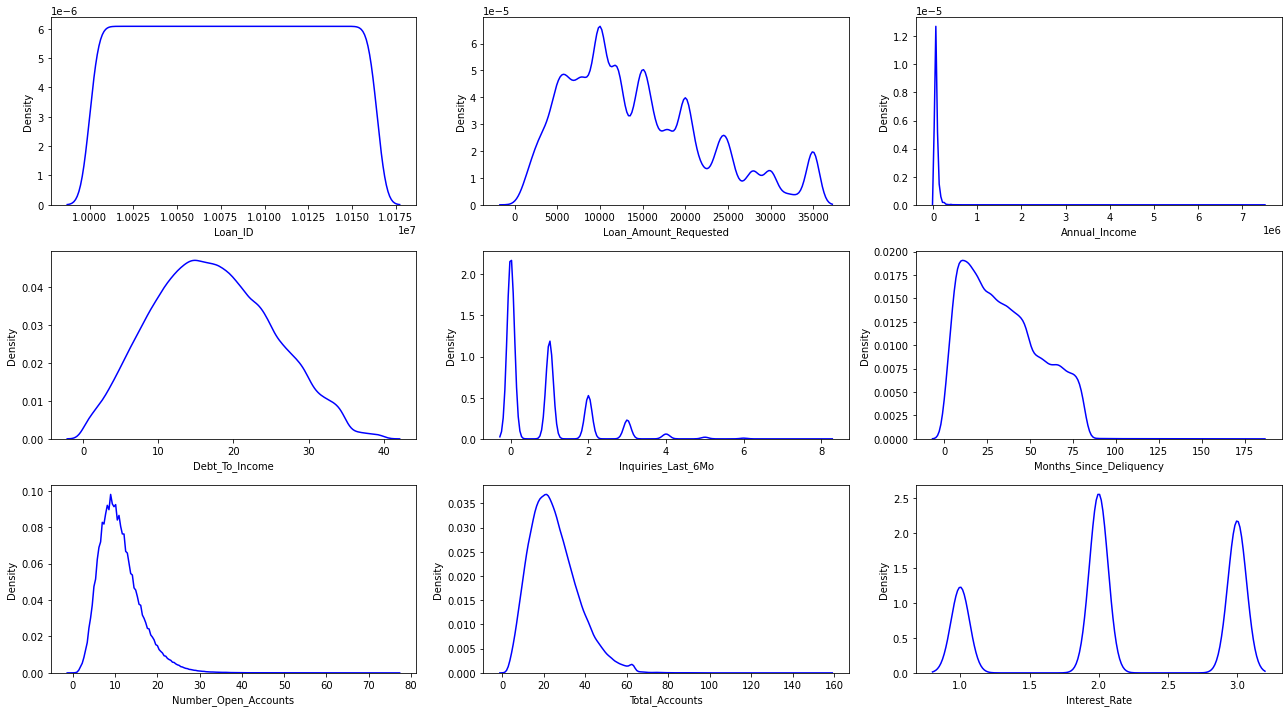

In [18]:
#Explorasi dengan visualisasi data distribution plot
features = nums
plt.figure(figsize=(18, 10))
for i in range(0, len(features)):
    plt.subplot(3, round(len(features)/3), i+1)
    sns.kdeplot(x=df_train[features[i]], color='blue')
    plt.xlabel(features[i])
    plt.tight_layout()

Untuk distribution plot, hal utama yang perlu diperhatikan adalah bentuk distribusi:

1. Data simetris (berdistribusi normal) terdapat pada kolom Loan_ID, Debt_To_Income, dan Interest_Rate.
2. Kolom Loan_Amount_Requested, Annual_Income, Inquiries_Last_6Mo, Months_Since_Deliquency, Number_Open_Accounts, dan Total_Accounts cenderung skewed ke kanan (positively skewed). Berarti ada kemungkinan perlu melakukan sesuatu (action) pada kolom-kolom tersebut nantinya.


## Boxplot

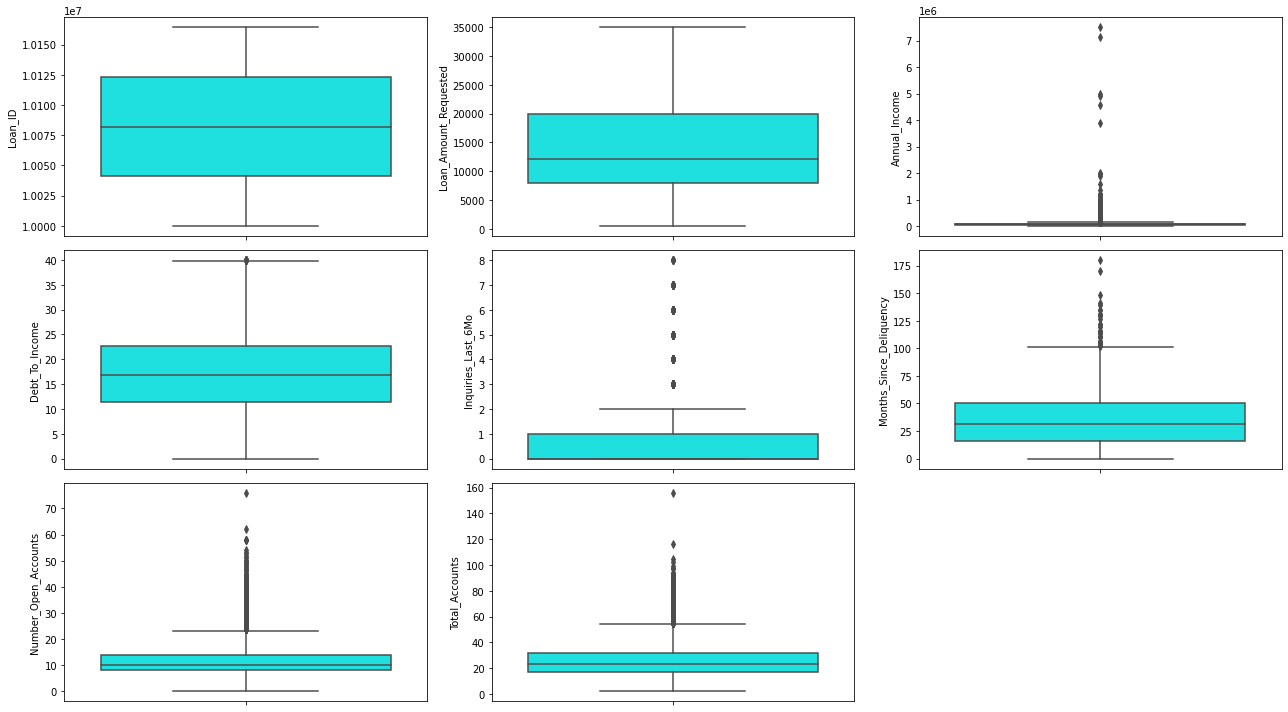

In [19]:
#Explorasi dengan visualisasi data boxplot
temp_numps = list(filter(lambda x:x not in ['Interest_Rate'], nums)) # Filter beberapa kolom yang seharusnya merupakan kolom categorical
features = temp_numps
plt.figure(figsize = (18, 10))
for i in range(0, len(features)):
    plt.subplot(3, round(len(features)/3), i+1)
    sns.boxplot(y=df_train[features[i]], color='cyan', orient='v')
    plt.tight_layout()

Untuk boxplot, hal paling penting yang harus kita perhatikan adalah keberadaan outlier.

Pengamatan :
1. Outlier utamanya terlihat pada kolom Annual_Income, Inquiries_Last_6Mo dan Total_Accounts. Yang mana ketiga kolom tersebut perlu diwaspadai, karena memiliki outlier yang jaraknya jauh.
2. Data simetris (berdistribusi normal) terdapat pada kolom Loan_ID dan Debt_To_Income.
3. Distribusi data yang cenderung skewed ke kanan (positively skewed) terdapat pada kolom Loan_Amount_Requested, Annual_Income, Inquiries_Last_6Mo, Months_Since_Deliquency, Number_Open_Accounts, dan Total_Accounts.

## Categorical Features



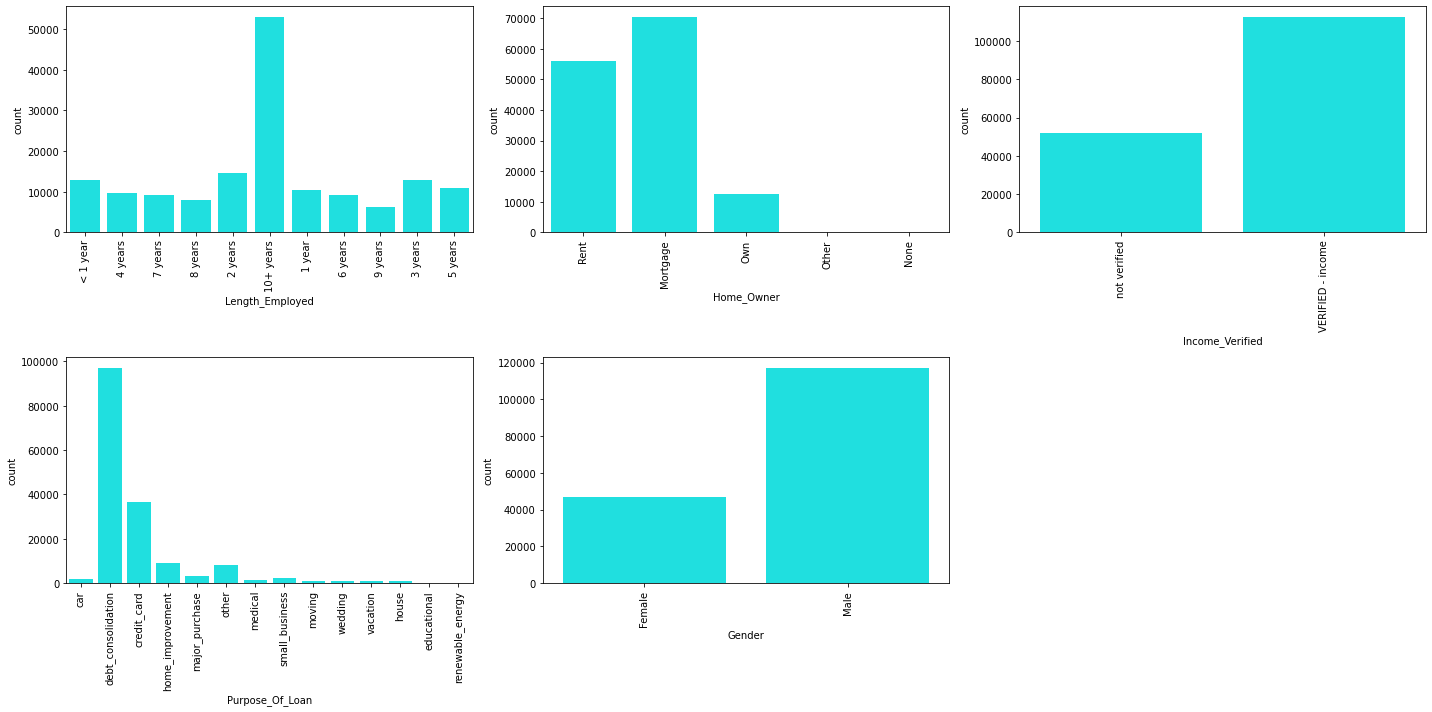

In [20]:
#Explorasi dengan visualisasi countplot dengan data kategorik
df_train_sample = df_train.sample(1000, random_state=50)
plt.figure(figsize=(20, 10))
for i in range(0, len(cats)):
  plt.subplot(2, 3, i+1)
  sns.countplot(x = df_train[cats[i]], color='cyan', orient='v')
  plt.xticks(rotation=90)
  plt.tight_layout()

Pengamatan :
1. Mayoritas customer yang meminjam uang sudah bekerja lebih dari 10 tahun.
2. Kebanyakan customer yang meminjam uang memiliki kepemilikan rumah dalam masa gadai (Mortgage).
3. Mayoritas customer yang meminjam uang memiliki sumber pendapatan yang terverifikasi.
4. Tujuan peminjaman uang didominasi oleh customer yang meminjam untuk membayar pinjaman lainnya (debt_consolidation).
5. Customer berjenis kelamin laki-laki lebih banyak dibandingkan dengan customer yang berjenis kelamin perempuan.

## **Multivariate Analysis**

## Correlation Heatmap

In [21]:
df_train.corr()

,Loan_ID,Loan_Amount_Requested,Annual_Income,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Interest_Rate
Loan_ID,1.000000,0.001305,0.008326,-0.001320,0.002593,0.002111,0.004626,0.005331,0.001290
Loan_Amount_Requested,0.001305,1.000000,0.337695,0.058314,-0.007659,-0.044224,0.203087,0.233424,0.132486
Annual_Income,0.008326,0.337695,1.000000,-0.173589,0.060011,-0.057804,0.145822,0.203237,-0.052783
Debt_To_Income,-0.001320,0.058314,-0.173589,1.000000,-0.005142,0.006394,0.302442,0.229871,0.152472
Inquiries_Last_6Mo,0.002593,-0.007659,0.060011,-0.005142,1.000000,0.011971,0.100930,0.131467,0.188987
Months_Since_Deliquency,0.002111,-0.044224,-0.057804,0.006394,0.011971,1.000000,-0.049683,-0.062261,-0.042108
Number_Open_Accounts,0.004626,0.203087,0.145822,0.302442,0.100930,-0.049683,1.000000,0.682137,0.002847
Total_Accounts,0.005331,0.233424,0.203237,0.229871,0.131467,-0.062261,0.682137,1.000000,-0.040690
Interest_Rate,0.001290,0.132486,-0.052783,0.152472,0.188987,-0.042108,0.002847,-0.040690,1.000000


<AxesSubplot:>

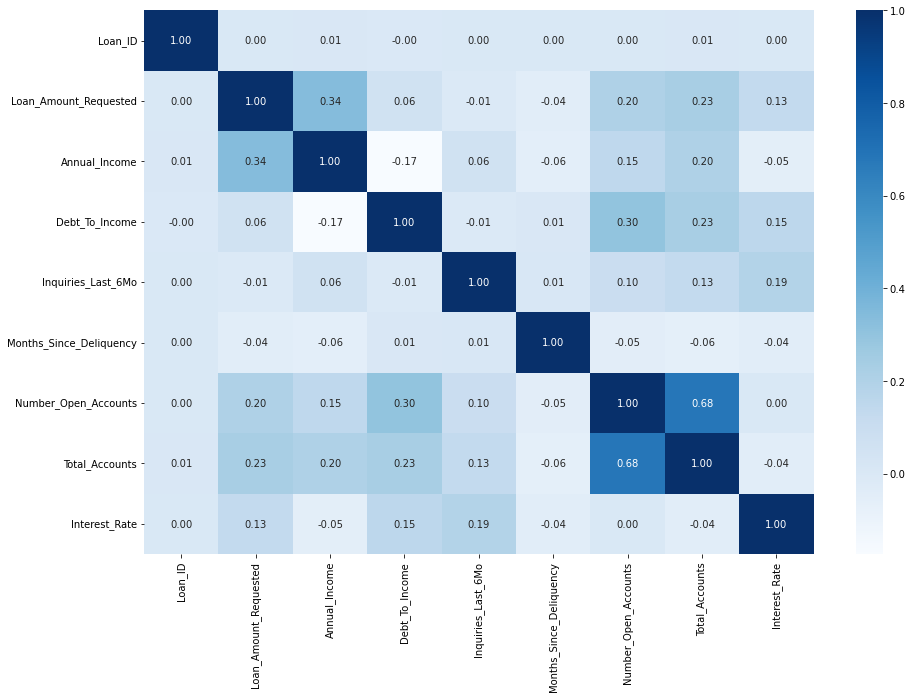

In [22]:
#correlation heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(df_train.corr(), cmap='Blues', annot=True, fmt='.2f')

Pengamatan Heatmap di atas adalah :

1. Target adalah Kolom Interest_Rate punya koefisien korelasi tertinggi terhadap Inquiries_Last_6Mo dengan nilai 0.19 (strong potential feature), diikuti dengan kolom Debt_To_Income dengan nilai 0.15.
2. Kolom Loan_ID, Months_Since_Deliquency, Number_Open_Accounts dan Total_Accounts memiliki koefisien korelasi cukup rendah terhadap kolom Interest_Rate yang menandakan bahwa kolom-kolom tersebut bukan feature yang potensial.
3. Kolom Total_Accounts memiliki korelasi positif cukup kuat dengan kolom Number_Open_Accounts. mencapai 0.68, membuat kesimpulan bahwa ada kecenderungan applicant untuk membuka tabungan untuk mengajukan pinjaman dari total rekening yang dia punya.
4. Kolom Number_Open_Accounts memiliki korelasi cukup tinggi dengan kolom Debt_To_Income.
5. Kolom Total_Accounts memiliki korelasi cukup tinggi dengan kolom Debt_To_Income dan Loan_Amount_Requested, kemudian disusul kolom Annual_Income.
6. Kolom Loan_Amount_Requested memiliki korelasi positif cukup kuat dengan kolom Annual_Income. 

<Figure size 1440x1080 with 0 Axes>

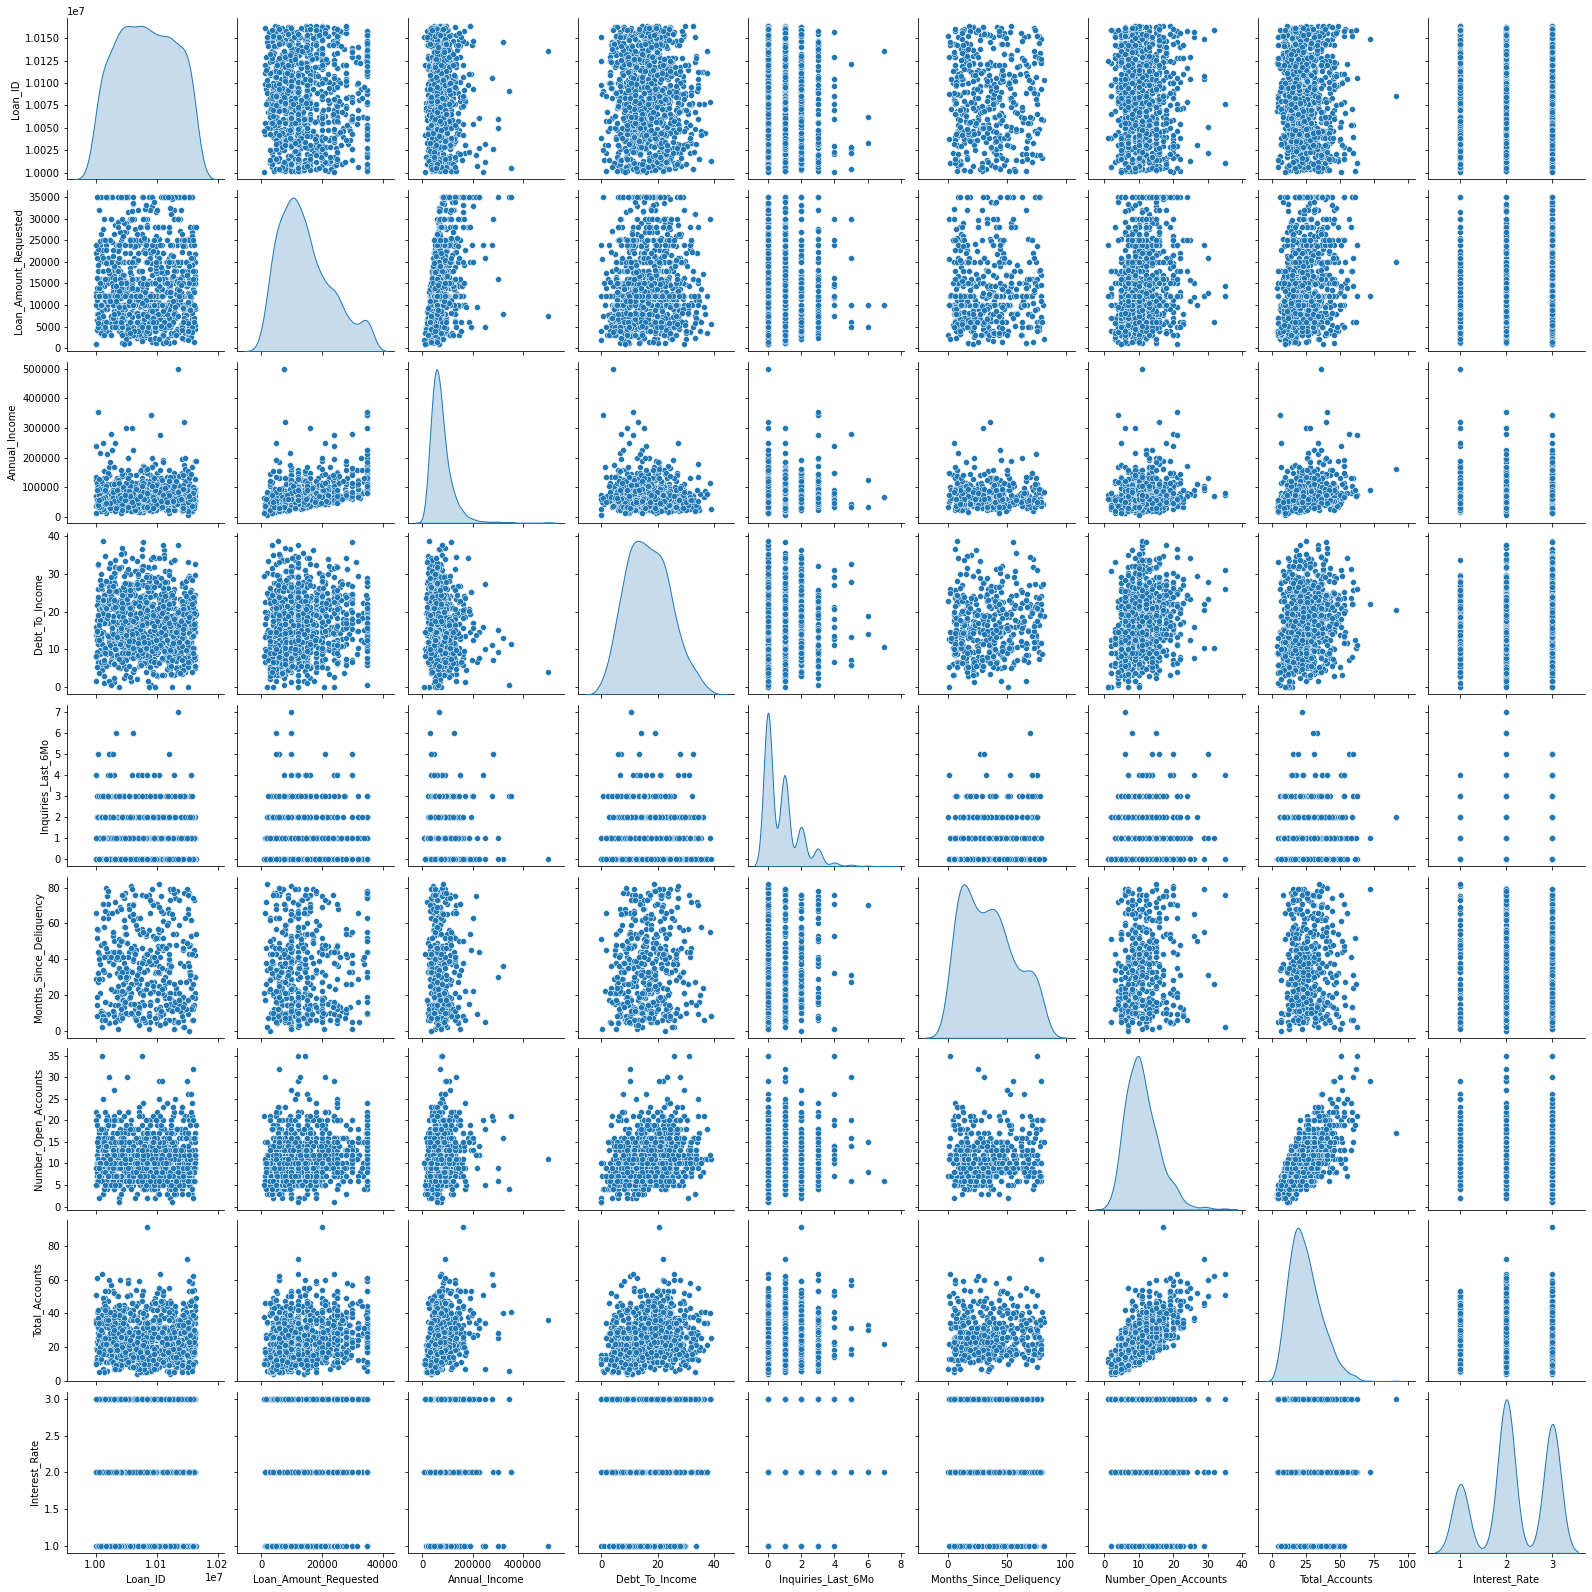

In [23]:
#menggunakan sample dari full dataset
plt.figure(figsize=(20, 15))
sns.pairplot(df_train_sample, diag_kind='kde')

Dari pair plot di atas, pengamatan yang didapat adalah :
1. Interest_Rate cenderung dipengaruhi oleh Inquiries_Last_6Mo dan Debt_To_Income.
2. Number_Open_Accounts dan Total_Accounts terlihat memiliki korelasi yang linear.
3. Loan_Amount_Requested dan Annual_Income terlihat memiliki korelasi yang linear. 

## Category columns VS Target Variable

Length_Employed


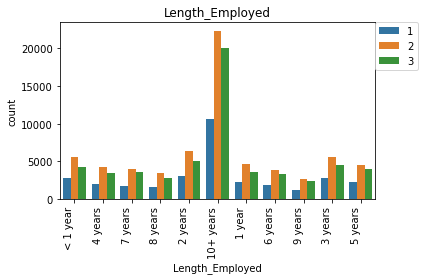

Home_Owner


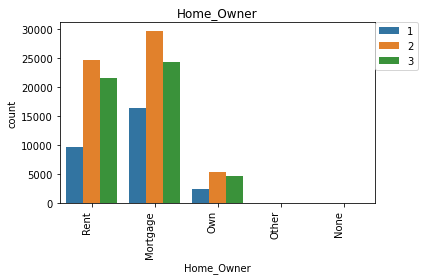

Income_Verified


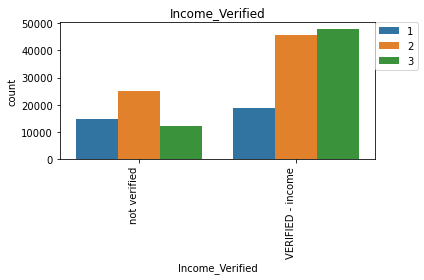

Purpose_Of_Loan


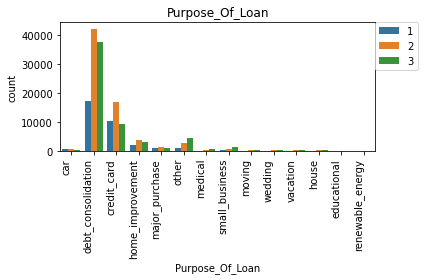

Gender


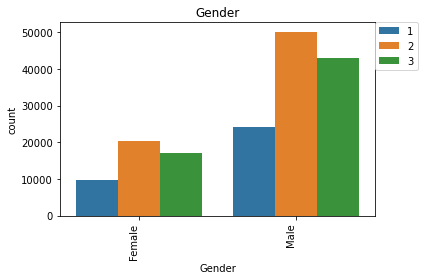

In [24]:
for col in cats:
    print(col)
    ax = sns.countplot(data=df_train, x=col, hue='Interest_Rate')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
    plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
    plt.title(col)
    plt.tight_layout()
    plt.show()

Pengamatan :
1. Berdasarkan lama pekerjaan terlihat bahwa customer yang sudah bekerja lebih dari 10 tahun memiliki paling banyak pinjaman dengan suku bunga kategori 2, kemudian disusul dengan pinjaman suku bunga kategori 3.
2. Ternyata kepemilikan rumah customer yang meminjam uang didominasi oleh Mortgage dengan paling banyak memiliki pinjaman suku bunga kategori 2, kemudian suku bunga kategori 3. Setelah itu di dominasi oleh customer yang mengontrak yang memiliki memiliki pinjaman suku bunga kategori 2.
3. Mayoritas customer yang memiliki suku bunga pinjaman kategori 3, kemudian diikuti suku bunga kategori 2 memiliki sumber pendapatan yang sudah terverifikasi.
4. Tujuan meminjam uang oleh customer paling banyak untuk debt consolidation, dimana didominasi oleh customer yang meminjam dengan suku bunga kategori 2, kemudian disusul pada suku bunga kategori 3.
5. Customer yang berjenis kelamin laki-laki cenderung lebih banyak meminjam uang dengan suku bunga kategori 2 daripada customer berjenis kelamin perempuan.

## Nilai Missing Value Dalam Persentase

In [25]:
#mencari kolom yang memiliki nilai missing value
df_train.isna().sum()

Loan_ID                        0
Loan_Amount_Requested          0
Length_Employed             7371
Home_Owner                 25349
Annual_Income              25102
Income_Verified                0
Purpose_Of_Loan                0
Debt_To_Income                 0
Inquiries_Last_6Mo             0
Months_Since_Deliquency    88379
Number_Open_Accounts           0
Total_Accounts                 0
Gender                         0
Interest_Rate                  0
dtype: int64

In [26]:
#mencari nilai persentase dari kolom missing value
list_null = ['Length_Employed', 'Home_Owner','Annual_Income','Months_Since_Deliquency']
persentase = []
for i in df_train.isna().sum().to_list():
  if not (i == 0.0):
    persentase.append(str(round((i/164309) * 100,2))+'%')

In [27]:
for i,j in zip(list_null, persentase):
  print(i,'sebanyak',j ,end=', ')

Length_Employed sebanyak 4.49%, Home_Owner sebanyak 15.43%, Annual_Income sebanyak 15.28%, Months_Since_Deliquency sebanyak 53.79%, 

## **EDA Conclusion**

Hal-hal yang ditermukan dari EDA dataset ini adalah :
1. Data ada anomali pada beberapa entri kolom seperti Months_Since_Deliquency.
2. Terlihat bahwa kolom Loan_Amount_Requested seharusnya itu kolom numerik tapi terbaca sebagai data kategorik, sehingga perlu diubah tipe datanya menjadi numerik.
3. Terdapat beberapa nilai null pada kolom: Length_Employed sebanyak 4.49%, Home_Owner sebanyak 15.43%, Annual_Income sebanyak 15.28%, Months_Since_Deliquency sebanyak 53.79% sehingga membutuhkan replacement untuk insight lebih lanjut (Data Pre-Processing).
4. Terdapat kolom yang berpotensi untuk dijadikan fitur yaitu kolom Number_Open_Accounts dengan Total_Accounts dan kolom Loan_Amount_Requested dan Annual_Income.
5. Kolom Annual_Income, Inquiries_Last_6Mo dan Total_Accounts terdapat outlier yang perlu diwaspadai karena jaraknya terlalu jauh dari Quartil 1 ataupun Quartil 3. 
6. Terdapat distribusi data yang cenderung skewed ke kanan (positively skewed) terdapat pada kolom Loan_Amount_Requested, Annual_Income, Inquiries_Last_6Mo, Months_Since_Deliquency, Number_Open_Accounts, dan Total_Accounts.
7. Interest_Rate cenderung dipengaruhi oleh Inquiries_Last_6Mo dan Debt_To_Income, sepertinya berguna untuk menjadi prediktor model.
8. Terdapat data yang nama valuenya tidak serupa ditemukan pada kolom Income_Verified (VERIFIED - income dan VERIFIED - income source).
9. Kolom Loan_ID, Months_Since_Deliquency, Number_Open_Accounts dan Total_Accounts tidak memiliki korelasi terhadap kolom Interest_Rate, maka kolom-kolom tersebut diabaikan saja.

## Data Pre-Processing

## Changing Datatype

In [28]:
#Mengubah Data Kolom Loan_Amount_Requested dari Integer menjadi Float
df_train['Loan_Amount_Requested'] = df_train['Loan_Amount_Requested'].astype(float)

In [29]:
df_train['Loan_Amount_Requested'].dtype

dtype('float64')

### Missing Value

In [30]:
# jumlah entry NULL di setiap kolom
df_train.isna().sum()

Loan_ID                        0
Loan_Amount_Requested          0
Length_Employed             7371
Home_Owner                 25349
Annual_Income              25102
Income_Verified                0
Purpose_Of_Loan                0
Debt_To_Income                 0
Inquiries_Last_6Mo             0
Months_Since_Deliquency    88379
Number_Open_Accounts           0
Total_Accounts                 0
Gender                         0
Interest_Rate                  0
dtype: int64

Berikut adalah strategi untuk mengatasi missing values pada setiap kolom. 
<br>
* `Length_Employed` \: Drop saja (karena jumlahnya kecil)
* `Home_Owner` \: impute dengan nilai modus (Mortgage)
* `Annual_Income` \: impute dengan nilai median (dari `df_train.describe` bahwa distribusinya positevely skewed)
* `Months_Since_Deliquency` \: impute dengan nilai median (dari `df_train.describe` bahwa distribusinya positevely skewed)

In [31]:
#Menghapus baris Length_Employed yang Null
df_train = df_train.dropna(subset=['Length_Employed'])

In [32]:
#impute Home_Owner dengan nilai Modus yaitu Mortgage
df_train['Home_Owner'].fillna(df_train['Home_Owner'].mode()[0], inplace=True)

In [33]:
#impute Annual_Income dan Months_Since_Deliquency dengan Median
df_train['Annual_Income'].fillna(df_train['Annual_Income'].median(), inplace=True)
df_train['Months_Since_Deliquency'].fillna(df_train['Months_Since_Deliquency'].median(), inplace=True)

In [34]:
#cek jumlah missing data setelah preprocessing
df_train.isna().sum()

Loan_ID                    0
Loan_Amount_Requested      0
Length_Employed            0
Home_Owner                 0
Annual_Income              0
Income_Verified            0
Purpose_Of_Loan            0
Debt_To_Income             0
Inquiries_Last_6Mo         0
Months_Since_Deliquency    0
Number_Open_Accounts       0
Total_Accounts             0
Gender                     0
Interest_Rate              0
dtype: int64

### Duplicated Data

In [35]:
#cek jumlah duplicated rows dari semua kolom
df_train.duplicated().sum()

0

### Outliers Handling

Handling menggunakan z-score dengan log transform pada kolom Annual_Income

<AxesSubplot:xlabel='Annual_Income', ylabel='Density'>

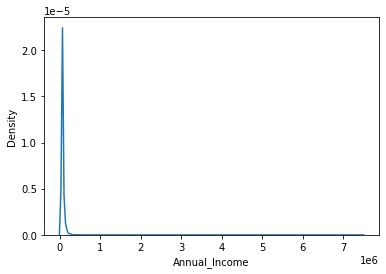

In [36]:
#distribusi nilai Annual_Income (nilai asli)
sns.kdeplot(df_train['Annual_Income'])

<AxesSubplot:xlabel='Annual_Income', ylabel='Density'>

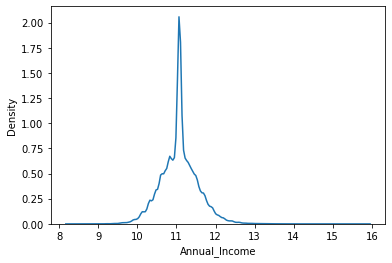

In [37]:
#Distribusi Annual_Income (setelah log transformation)
sns.kdeplot(np.log(df_train['Annual_Income']))

Berdasarkan grafik di atas bahwa kolom Annual_Income lebih mendekati distribusi normal.

In [38]:
#Menggunakan Log Transformation untuk kolom Annual_Income
df_train['Log_Annual_Income'] = np.log(df_train['Annual_Income'])

In [39]:
#Drop kolom Annual_Income original
df_train = df_train.drop(columns='Annual_Income')

In [40]:
#Actual Outlier Handling Using Z-score Method
nums_updated = ['Loan_ID',
 'Loan_Amount_Requested',
 'Log_Annual_Income', #update kolom setelah di log transfrom
 'Debt_To_Income',
 'Inquiries_Last_6Mo',
 'Months_Since_Deliquency',
 'Number_Open_Accounts',
 'Total_Accounts',
 'Interest_Rate']

In [41]:
from scipy import stats

print(f'Jumlah baris sebelum memfilter outlier: {len(df_train)}')

filtered_entries = np.array([True] * len(df_train))

for col in nums_updated:
    zscore = abs(stats.zscore(df_train[col])) # hitung absolute z-scorenya
    filtered_entries = (zscore < 3) & filtered_entries # keep yang kurang dari 3 absolute z-scorenya
    
df_train = df_train[filtered_entries] # filter, cuma ambil yang z-scorenya dibawah 3

print(f'Jumlah baris setelah memfilter outlier: {len(df_train)}')

Jumlah baris sebelum memfilter outlier: 156938
Jumlah baris setelah memfilter outlier: 147876


In [42]:
#mengecek kembali apakah masih ada kolom yang missing atau tidak
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147876 entries, 0 to 164308
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Loan_ID                  147876 non-null  int64  
 1   Loan_Amount_Requested    147876 non-null  float64
 2   Length_Employed          147876 non-null  object 
 3   Home_Owner               147876 non-null  object 
 4   Income_Verified          147876 non-null  object 
 5   Purpose_Of_Loan          147876 non-null  object 
 6   Debt_To_Income           147876 non-null  float64
 7   Inquiries_Last_6Mo       147876 non-null  int64  
 8   Months_Since_Deliquency  147876 non-null  float64
 9   Number_Open_Accounts     147876 non-null  int64  
 10  Total_Accounts           147876 non-null  int64  
 11  Gender                   147876 non-null  object 
 12  Interest_Rate            147876 non-null  int64  
 13  Log_Annual_Income        147876 non-null  float64
dtypes: f

## Normalization/Standardization

In [43]:
#Cek dataframe sebelum di Standarisasi dan Normalisasi
df_train.describe()

,Loan_ID,Loan_Amount_Requested,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Interest_Rate,Log_Annual_Income
count,1.478760e+05,147876.000000,147876.000000,147876.000000,147876.000000,147876.000000,147876.000000,147876.000000,147876.000000
mean,1.008217e+07,14381.291251,17.124194,0.699586,31.815048,10.971402,24.460136,2.150335,11.063388
std,4.740969e+04,8206.009679,7.790768,0.887507,13.850949,4.536655,10.735718,0.738649,0.441163
min,1.000000e+07,500.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,9.670294
25%,1.004113e+07,8000.000000,11.320000,0.000000,31.000000,8.000000,16.000000,2.000000,10.819778
50%,1.008217e+07,12300.000000,16.750000,0.000000,31.000000,10.000000,23.000000,2.000000,11.074421
75%,1.012320e+07,20000.000000,22.630000,1.000000,31.000000,14.000000,31.000000,3.000000,11.314475
max,1.016431e+07,35000.000000,39.990000,3.000000,77.000000,26.000000,59.000000,3.000000,12.483704


In [44]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

#Loan_Amount_Requested, Months_Since_Deliquency, Number_Open_Accounts, dan Total_Accounts perlu di re-scale ke [0,1] (normalisasi)
df_train['Loan_Amount_Requested_Normal'] = MinMaxScaler().fit_transform(df_train['Loan_Amount_Requested'].values.reshape(len(df_train), 1))
df_train['Months_Since_Deliquency_Normal'] = MinMaxScaler().fit_transform(df_train['Months_Since_Deliquency'].values.reshape(len(df_train), 1))
df_train['Number_Open_Accounts_Normal'] = MinMaxScaler().fit_transform(df_train['Number_Open_Accounts'].values.reshape(len(df_train), 1))
df_train['Total_Accounts_Normal'] = MinMaxScaler().fit_transform(df_train['Total_Accounts'].values.reshape(len(df_train), 1))

#Debt_To_Income, Inquiries_Last_6Mo, dan Log_Annual_Income kita standarisasi (karena distribusi datanya sudah mendekati normal)
df_train['Debt_To_Income_Std'] = StandardScaler().fit_transform(df_train['Debt_To_Income'].values.reshape(len(df_train), 1))
df_train['Inquiries_Last_6Mo_Std'] = StandardScaler().fit_transform(df_train['Inquiries_Last_6Mo'].values.reshape(len(df_train), 1))
df_train['Log_Annual_Income_Std'] = StandardScaler().fit_transform(df_train['Log_Annual_Income'].values.reshape(len(df_train), 1))

In [45]:
#cek keberhasilan feature transformation
df_train.describe()

,Loan_ID,Loan_Amount_Requested,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Interest_Rate,Log_Annual_Income,Loan_Amount_Requested_Normal,Months_Since_Deliquency_Normal,Number_Open_Accounts_Normal,Total_Accounts_Normal,Debt_To_Income_Std,Inquiries_Last_6Mo_Std,Log_Annual_Income_Std
count,1.478760e+05,147876.000000,147876.000000,147876.000000,147876.000000,147876.000000,147876.000000,147876.000000,147876.000000,147876.000000,147876.000000,147876.000000,147876.000000,1.478760e+05,1.478760e+05,1.478760e+05
mean,1.008217e+07,14381.291251,17.124194,0.699586,31.815048,10.971402,24.460136,2.150335,11.063388,0.402356,0.413182,0.421977,0.394037,1.682922e-16,2.961599e-15,-7.607388e-17
std,4.740969e+04,8206.009679,7.790768,0.887507,13.850949,4.536655,10.735718,0.738649,0.441163,0.237855,0.179882,0.174487,0.188346,1.000003e+00,1.000003e+00,1.000003e+00
min,1.000000e+07,500.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,9.670294,0.000000,0.000000,0.000000,0.000000,-2.198019e+00,-7.882628e-01,-3.157789e+00
25%,1.004113e+07,8000.000000,11.320000,0.000000,31.000000,8.000000,16.000000,2.000000,10.819778,0.217391,0.402597,0.307692,0.245614,-7.450117e-01,-7.882628e-01,-5.522017e-01
50%,1.008217e+07,12300.000000,16.750000,0.000000,31.000000,10.000000,23.000000,2.000000,11.074421,0.342029,0.402597,0.384615,0.368421,-4.803058e-02,-7.882628e-01,2.500697e-02
75%,1.012320e+07,20000.000000,22.630000,1.000000,31.000000,14.000000,31.000000,3.000000,11.314475,0.565217,0.402597,0.538462,0.508772,7.067114e-01,3.384931e-01,5.691479e-01
max,1.016431e+07,35000.000000,39.990000,3.000000,77.000000,26.000000,59.000000,3.000000,12.483704,1.000000,1.000000,1.000000,1.000000,2.934997e+00,2.592005e+00,3.219492e+00


# Feature Encoding

In [46]:
cats

['Length_Employed',
 'Home_Owner',
 'Income_Verified',
 'Purpose_Of_Loan',
 'Gender']

In [47]:
for col in cats:
  print(f'value counts of column {col}')
  print(df_train[col].value_counts())
  print('---'*10, '\n')

value counts of column Length_Employed
10+ years    49845
2 years      13750
3 years      12212
< 1 year     12054
5 years      10247
1 year        9835
4 years       9206
7 years       8756
6 years       8598
8 years       7449
9 years       5924
Name: Length_Employed, dtype: int64
------------------------------ 

value counts of column Home_Owner
Mortgage    85662
Rent        51388
Own         10770
Other          47
None            9
Name: Home_Owner, dtype: int64
------------------------------ 

value counts of column Income_Verified
VERIFIED - income    98336
not verified         49540
Name: Income_Verified, dtype: int64
------------------------------ 

value counts of column Purpose_Of_Loan
debt_consolidation    87938
credit_card           32977
home_improvement       8022
other                  7399
major_purchase         3079
small_business         2146
car                    1681
medical                1379
moving                  863
wedding                 766
vacation      

Strategi Encoding
* `Gender` dan `Income_Verified` \: Label Encoding karena memiliki distinct values = 2
* `Length_Employed`, `Home_Owner`, & `Purpose_Of_Loan` \: One Hot Encoding memiliki ordinal kategorik

In [48]:
#Label Encoding Gender dan Income_Verified
mapping_gender = {
    'Male' : 0,
    'Female' : 1
}

df_train['Gender'] = df_train['Gender'].map(mapping_gender)

mapping_income = {
    'VERIFIED - income' : 0,
    'not verified' : 1
}

df_train['Income_Verified'] = df_train['Income_Verified'].map(mapping_income)

In [49]:
#One Hot Encoding Length_Employed, Home_Owner, dan Purpose_Of_Loan
# WARNING: run code ini sekali saja
for cat in ['Length_Employed', 'Home_Owner', 'Purpose_Of_Loan']:
    onehots = pd.get_dummies(df_train[cat], prefix=cat)
    df_train = df_train.join(onehots)

## Drop Kolom-Kolom yang Outdated

In [50]:
#Drop kolom Length_Employed, Home_Owner, Income_Verified dan Purpose_Of_Loan yang asli (karena sudah di-encoding) termasuk kolom yang sudah di transformation, normalization dan standardization
df_train = df_train.drop(columns=['Length_Employed', 'Home_Owner','Purpose_Of_Loan', 'Log_Annual_Income', 'Loan_Amount_Requested', 'Debt_To_Income', 'Inquiries_Last_6Mo', 'Months_Since_Deliquency', 'Number_Open_Accounts', 'Total_Accounts'])
df_train

,Loan_ID,Income_Verified,Gender,Interest_Rate,Loan_Amount_Requested_Normal,Months_Since_Deliquency_Normal,Number_Open_Accounts_Normal,Total_Accounts_Normal,Debt_To_Income_Std,Inquiries_Last_6Mo_Std,...,Purpose_Of_Loan_home_improvement,Purpose_Of_Loan_house,Purpose_Of_Loan_major_purchase,Purpose_Of_Loan_medical,Purpose_Of_Loan_moving,Purpose_Of_Loan_other,Purpose_Of_Loan_renewable_energy,Purpose_Of_Loan_small_business,Purpose_Of_Loan_vacation,Purpose_Of_Loan_wedding
0,10000001,1,1,1,0.188406,0.402597,0.346154,0.210526,0.159909,-0.788263,...,0,0,0,0,0,0,0,0,0,0
1,10000002,0,1,3,0.855072,0.220779,0.461538,0.385965,-0.281641,-0.788263,...,0,0,0,0,0,0,0,0,0,0
2,10000003,0,0,3,0.702174,0.402597,0.461538,0.245614,-0.159702,-0.788263,...,0,0,0,0,0,0,0,0,0,0
3,10000004,0,0,3,0.449275,0.402597,0.615385,0.350877,-0.357372,2.592005,...,0,0,0,0,0,0,0,0,0,0
4,10000005,0,1,1,0.478261,0.402597,0.730769,0.491228,0.647667,0.338493,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164303,10164304,0,0,3,1.000000,0.480519,0.384615,0.649123,0.890263,-0.788263,...,0,0,0,0,0,0,0,0,0,0
164304,10164305,0,0,2,0.586232,0.402597,0.500000,0.245614,-0.457491,-0.788263,...,0,0,0,0,0,0,0,0,0,0
164305,10164306,0,0,2,0.159420,0.467532,0.500000,0.491228,-1.027398,-0.788263,...,0,0,0,0,0,0,0,1,0,0
164306,10164307,0,0,1,0.572464,0.402597,0.653846,0.491228,0.134237,0.338493,...,0,0,0,0,0,0,0,0,0,0


In [51]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147876 entries, 0 to 164308
Data columns (total 41 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Loan_ID                             147876 non-null  int64  
 1   Income_Verified                     147876 non-null  int64  
 2   Gender                              147876 non-null  int64  
 3   Interest_Rate                       147876 non-null  int64  
 4   Loan_Amount_Requested_Normal        147876 non-null  float64
 5   Months_Since_Deliquency_Normal      147876 non-null  float64
 6   Number_Open_Accounts_Normal         147876 non-null  float64
 7   Total_Accounts_Normal               147876 non-null  float64
 8   Debt_To_Income_Std                  147876 non-null  float64
 9   Inquiries_Last_6Mo_Std              147876 non-null  float64
 10  Log_Annual_Income_Std               147876 non-null  float64
 11  Length_Employed_1 year    

## Data Modelling and Evaluation

Kita akan mencoba menggunakan Model RandomForest dan Regresi serta dievaluasi dengan Cross Validation

In [52]:
#Checking korelasi kembali dengan kolom Interest Rate
df_train.corr()['Interest_Rate'][:]

Loan_ID                               0.000891
Income_Verified                      -0.198926
Gender                               -0.001608
Interest_Rate                         1.000000
Loan_Amount_Requested_Normal          0.137629
Months_Since_Deliquency_Normal       -0.019669
Number_Open_Accounts_Normal          -0.000271
Total_Accounts_Normal                -0.049130
Debt_To_Income_Std                    0.151225
Inquiries_Last_6Mo_Std                0.185212
Log_Annual_Income_Std                -0.079571
Length_Employed_1 year               -0.012402
Length_Employed_10+ years             0.019300
Length_Employed_2 years              -0.009934
Length_Employed_3 years              -0.010973
Length_Employed_4 years              -0.005115
Length_Employed_5 years               0.001821
Length_Employed_6 years               0.005180
Length_Employed_7 years               0.010964
Length_Employed_8 years              -0.000119
Length_Employed_9 years               0.007863
Length_Employ

In [53]:
#Memisahkan value dan features yang ingin di prediksi
x = df_train.iloc[:,1:]

In [54]:
x.head()

,Income_Verified,Gender,Interest_Rate,Loan_Amount_Requested_Normal,Months_Since_Deliquency_Normal,Number_Open_Accounts_Normal,Total_Accounts_Normal,Debt_To_Income_Std,Inquiries_Last_6Mo_Std,Log_Annual_Income_Std,...,Purpose_Of_Loan_home_improvement,Purpose_Of_Loan_house,Purpose_Of_Loan_major_purchase,Purpose_Of_Loan_medical,Purpose_Of_Loan_moving,Purpose_Of_Loan_other,Purpose_Of_Loan_renewable_energy,Purpose_Of_Loan_small_business,Purpose_Of_Loan_vacation,Purpose_Of_Loan_wedding
0,1,1,1,0.188406,0.402597,0.346154,0.210526,0.159909,-0.788263,0.144787,...,0,0,0,0,0,0,0,0,0,0
1,0,1,3,0.855072,0.220779,0.461538,0.385965,-0.281641,-0.788263,0.025007,...,0,0,0,0,0,0,0,0,0,0
2,0,0,3,0.702174,0.402597,0.461538,0.245614,-0.159702,-0.788263,0.383938,...,0,0,0,0,0,0,0,0,0,0
3,0,0,3,0.449275,0.402597,0.615385,0.350877,-0.357372,2.592005,-0.288847,...,0,0,0,0,0,0,0,0,0,0
4,0,1,1,0.478261,0.402597,0.730769,0.491228,0.647667,0.338493,0.926452,...,0,0,0,0,0,0,0,0,0,0


In [55]:
#Value yang ingin di prediksi
y = df_train['Interest_Rate']

In [56]:
y.head()

0    1
1    3
2    3
3    3
4    1
Name: Interest_Rate, dtype: int64

In [57]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42,stratify = df_train['Interest_Rate'])

## Let's begin the modelling

In [58]:
def accuracy(n):
    
    RF_CLF=RandomForestClassifier(n_estimators=n,random_state=42)
    RF_CLF.fit(x_train,y_train)
    y_pred=RF_CLF.predict(x_test)
    print('Skor Akurat dari jumlah estimasi: ',n,accuracy_score(y_test,y_pred))
    print(pd.crosstab(y_test,y_pred,rownames=['Kategori Pinjaman Aktual'],
    colnames=['Kategori Pinjaman yang Diprediksi']))

accuracy(500)

Skor Akurat dari jumlah estimasi:  500 1.0
Kategori Pinjaman yang Diprediksi     1      2      3
Kategori Pinjaman Aktual                             
1                                  9269      0      0
2                                     0  19156      0
3                                     0      0  15938


**Terlihat akurasi yang ditampilkan oleh modelling dengan estimator mencapai 500 bisa mendapatkan 100% akurasi**

In [59]:
def accuracy(n):
    
    RF_CLF=RandomForestClassifier(n_estimators=n,random_state=42)
    RF_CLF.fit(x_train,y_train)
    y_pred=RF_CLF.predict(x_test)
    print('Skor Akurat dari jumlah estimasi: ',n,accuracy_score(y_test,y_pred))
    print(pd.crosstab(y_test,y_pred,rownames=['Kategori Pinjaman Aktual'],
    colnames=['Kategori Pinjaman yang Diprediksi']))

accuracy(100)

Skor Akurat dari jumlah estimasi:  100 1.0
Kategori Pinjaman yang Diprediksi     1      2      3
Kategori Pinjaman Aktual                             
1                                  9269      0      0
2                                     0  19156      0
3                                     0      0  15938


**Kembali kita coba dengan estimator 100, Terlihat akurasi yang ditampilkan oleh modelling dengan estimator mencapai 100 bisa mendapatkan 100% akurasi**

In [60]:
from sklearn.linear_model import SGDClassifier

In [61]:
SGD_CLF=SGDClassifier(max_iter=500,random_state=42)

In [62]:
SGD_CLF.fit(x_train,y_train)

SGDClassifier(max_iter=500, random_state=42)

In [63]:
y_pred_SGD=SGD_CLF.predict(x_test)

In [64]:
print('Skor Akurat dari SGD Classifier: ',accuracy_score(y_test,y_pred_SGD))
print(pd.crosstab(y_test,y_pred_SGD,rownames=['Kategori Pinjaman Aktual'],
colnames=['Kategori Pinjaman yang Diprediksi']))

Skor Akurat dari SGD Classifier:  1.0
Kategori Pinjaman yang Diprediksi     1      2      3
Kategori Pinjaman Aktual                             
1                                  9269      0      0
2                                     0  19156      0
3                                     0      0  15938


**EVALUASI**

## Validasi Cross dengan KFolds

In [65]:
from sklearn.model_selection import cross_val_score

In [66]:
#Skor dari Modelling RandomForest
RN_F_Score=cross_val_score(RandomForestClassifier(n_estimators=100,random_state=42),x,y,cv=5)

In [67]:
#Mencoba menggunakan model lain seperti Regresi Logistic dan SVC
from sklearn.linear_model import LogisticRegression

In [68]:
#Skor dari Modelling Regresi Logistik
LR_Score=cross_val_score(LogisticRegression(max_iter=500,random_state=42),x,y,cv=5)

In [69]:
print('Rata-Rata Skor untuk Logistic Regression: ', LR_Score.mean())
print('Rata-Rata Skor untuk RandomForest Classifier: ', RN_F_Score.mean())

Rata-Rata Skor untuk Logistic Regression:  1.0
Rata-Rata Skor untuk RandomForest Classifier:  1.0


**Terlihat bahwa Evaluasi dari kedua model yaitu SGDC, Regresi Logistik, dan RandomForest memiliki nilai keakuratan yang sama di 100%, sehingga kita bisa menggunakan salah satu parameter tersebut untuk membuat pemodelan**

In [70]:
print('CLASSIFICATION REPORT',classification_report(y_test,y_pred_SGD))

CLASSIFICATION REPORT               precision    recall  f1-score   support

           1       1.00      1.00      1.00      9269
           2       1.00      1.00      1.00     19156
           3       1.00      1.00      1.00     15938

    accuracy                           1.00     44363
   macro avg       1.00      1.00      1.00     44363
weighted avg       1.00      1.00      1.00     44363



In [71]:
print('Skor Akurat dari SGD Classifier untuk 100 Estimator: ',accuracy_score(y_test,y_pred_SGD))
print(pd.crosstab(y_test,y_pred_SGD,rownames=['Kategori Pinjaman Aktual'],
colnames=['Kategori Pinjaman yang Diprediksi']))

Skor Akurat dari SGD Classifier untuk 100 Estimator:  1.0
Kategori Pinjaman yang Diprediksi     1      2      3
Kategori Pinjaman Aktual                             
1                                  9269      0      0
2                                     0  19156      0
3                                     0      0  15938


## Export Dataset terakhir yang sudah di modelkan

In [72]:
df_test = pd.read_csv("test.csv")

In [73]:
df_test.head()

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender
0,10164310,"27,500",10+ years,Mortgage,129000.0,VERIFIED - income,debt_consolidation,12.87,0,68.0,10,37,Male
1,10164311,"26,000",10+ years,NaN,110000.0,not verified,credit_card,11.37,0,NaN,6,23,Male
2,10164312,"6,075",< 1 year,Rent,75000.0,VERIFIED - income,debt_consolidation,6.83,2,NaN,5,20,Male
3,10164313,"12,000",10+ years,Mortgage,73000.0,VERIFIED - income source,debt_consolidation,7.76,0,NaN,6,8,Male
4,10164314,"35,000",< 1 year,Mortgage,156000.0,not verified,debt_consolidation,9.62,0,26.0,9,21,Male


In [74]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109541 entries, 0 to 109540
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Loan_ID                  109541 non-null  int64  
 1   Loan_Amount_Requested    109541 non-null  object 
 2   Length_Employed          104605 non-null  object 
 3   Home_Owner               92830 non-null   object 
 4   Annual_Income            92643 non-null   float64
 5   Income_Verified          109541 non-null  object 
 6   Purpose_Of_Loan          109541 non-null  object 
 7   Debt_To_Income           109541 non-null  float64
 8   Inquiries_Last_6Mo       109541 non-null  int64  
 9   Months_Since_Deliquency  50682 non-null   float64
 10  Number_Open_Accounts     109541 non-null  int64  
 11  Total_Accounts           109541 non-null  int64  
 12  Gender                   109541 non-null  object 
dtypes: float64(3), int64(4), object(6)
memory usage: 10.9+ MB


In [75]:
#Merubah kolom Loan_Amount_Requested dari Kategorik ke Numerik
df_test['Loan_Amount_Requested'] = df_test['Loan_Amount_Requested'].str.replace(',','')
df_test['Loan_Amount_Requested'] = pd.to_numeric(df_test['Loan_Amount_Requested'], errors='coerce')

In [76]:
df_test.isna().sum()

Loan_ID                        0
Loan_Amount_Requested          0
Length_Employed             4936
Home_Owner                 16711
Annual_Income              16898
Income_Verified                0
Purpose_Of_Loan                0
Debt_To_Income                 0
Inquiries_Last_6Mo             0
Months_Since_Deliquency    58859
Number_Open_Accounts           0
Total_Accounts                 0
Gender                         0
dtype: int64

In [78]:
test_cats = cats = []
test_nums = nums = []

for col in df_test.columns:
    if df_test[col].dtype ==  'O':
        cats.append(col)
    else:
        nums.append(col)

In [79]:
test_nums

['Loan_ID',
 'Loan_Amount_Requested',
 'Annual_Income',
 'Debt_To_Income',
 'Inquiries_Last_6Mo',
 'Months_Since_Deliquency',
 'Number_Open_Accounts',
 'Total_Accounts']

In [80]:
test_cats

['Length_Employed',
 'Home_Owner',
 'Income_Verified',
 'Purpose_Of_Loan',
 'Gender']

In [81]:
#Menyeragamkan value kolom VERIFIED - income source menjadi VERIFIED - income
def ganti_value2(x):
  if x == 'VERIFIED - income source':
    return 'VERIFIED - income'
  return x

df_test['Income_Verified'] = df_test['Income_Verified'].apply(ganti_value2)

In [82]:
list_null = ['Length_Employed', 'Home_Owner','Annual_Income','Months_Since_Deliquency']
persentase = []
for i in df_test.isna().sum().to_list():
  if not (i == 0.0):
    persentase.append(str(round((i/164309) * 100,2))+'%')

In [83]:
for i,j in zip(list_null, persentase):
  print(i,'sebanyak',j ,end=', ')

Length_Employed sebanyak 3.0%, Home_Owner sebanyak 10.17%, Annual_Income sebanyak 10.28%, Months_Since_Deliquency sebanyak 35.82%, 

In [84]:
df_test['Loan_Amount_Requested'] = df_test['Loan_Amount_Requested'].astype(float)
df_test['Loan_Amount_Requested'].dtype

dtype('float64')

In [85]:
#Menghapus baris Length_Employed yang Null
df_test = df_test.dropna(subset=['Length_Employed'])

In [86]:
#impute Home_Owner dengan nilai Modus yaitu Mortgage
df_test['Home_Owner'].fillna(df_test['Home_Owner'].mode()[0], inplace=True)

In [87]:
#impute Annual_Income dan Months_Since_Deliquency dengan Median
df_test['Annual_Income'].fillna(df_test['Annual_Income'].median(), inplace=True)
df_test['Months_Since_Deliquency'].fillna(df_test['Months_Since_Deliquency'].median(), inplace=True)

In [88]:
df_test.isna().sum()

Loan_ID                    0
Loan_Amount_Requested      0
Length_Employed            0
Home_Owner                 0
Annual_Income              0
Income_Verified            0
Purpose_Of_Loan            0
Debt_To_Income             0
Inquiries_Last_6Mo         0
Months_Since_Deliquency    0
Number_Open_Accounts       0
Total_Accounts             0
Gender                     0
dtype: int64

In [89]:
df_test['Log_Annual_Income'] = np.log(df_test['Annual_Income'])

In [90]:
#Drop kolom Annual_Income original
df_test = df_test.drop(columns='Annual_Income')

In [91]:
#Actual Outlier Handling Using Z-score Method
test_nums = nums_updated = ['Loan_ID',
 'Loan_Amount_Requested',
 'Log_Annual_Income', #update kolom setelah di log transfrom
 'Debt_To_Income',
 'Inquiries_Last_6Mo',
 'Months_Since_Deliquency',
 'Number_Open_Accounts',
 'Total_Accounts']

In [92]:
from scipy import stats

print(f'Jumlah baris sebelum memfilter outlier: {len(df_test)}')

filtered_entries = np.array([True] * len(df_test))

for col in nums_updated:
    zscore = abs(stats.zscore(df_test[col])) # hitung absolute z-scorenya
    filtered_entries = (zscore < 3) & filtered_entries # keep yang kurang dari 3 absolute z-scorenya
    
df_test = df_test[filtered_entries] # filter, cuma ambil yang z-scorenya dibawah 3

print(f'Jumlah baris setelah memfilter outlier: {len(df_test)}')

Jumlah baris sebelum memfilter outlier: 104605
Jumlah baris setelah memfilter outlier: 98189


In [93]:
df_test.describe()

,Loan_ID,Loan_Amount_Requested,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Log_Annual_Income
count,9.818900e+04,98189.000000,98189.000000,98189.000000,98189.000000,98189.00000,98189.000000,98189.000000
mean,1.021905e+07,14385.823005,17.150363,0.704723,31.012456,10.96135,24.450886,11.065235
std,3.162001e+04,8229.165597,7.778622,0.890007,13.678420,4.50446,10.711906,0.441079
min,1.016431e+07,500.000000,0.000000,0.000000,0.000000,0.00000,2.000000,9.670294
25%,1.019168e+07,8000.000000,11.330000,0.000000,30.000000,8.00000,16.000000,10.819778
50%,1.021898e+07,12175.000000,16.780000,0.000000,30.000000,10.00000,23.000000,11.082143
75%,1.024639e+07,20000.000000,22.630000,1.000000,30.000000,14.00000,31.000000,11.314475
max,1.027385e+07,35000.000000,39.990000,3.000000,76.000000,26.00000,59.000000,12.491252


In [94]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

#Loan_Amount_Requested, Months_Since_Deliquency, Number_Open_Accounts, dan Total_Accounts perlu di re-scale ke [0,1] (normalisasi)
df_test['Loan_Amount_Requested_Normal'] = MinMaxScaler().fit_transform(df_test['Loan_Amount_Requested'].values.reshape(len(df_test), 1))
df_test['Months_Since_Deliquency_Normal'] = MinMaxScaler().fit_transform(df_test['Months_Since_Deliquency'].values.reshape(len(df_test), 1))
df_test['Number_Open_Accounts_Normal'] = MinMaxScaler().fit_transform(df_test['Number_Open_Accounts'].values.reshape(len(df_test), 1))
df_test['Total_Accounts_Normal'] = MinMaxScaler().fit_transform(df_test['Total_Accounts'].values.reshape(len(df_test), 1))

#Debt_To_Income, Inquiries_Last_6Mo, dan Log_Annual_Income kita standarisasi (karena distribusi datanya sudah mendekati normal)
df_test['Debt_To_Income_Std'] = StandardScaler().fit_transform(df_test['Debt_To_Income'].values.reshape(len(df_test), 1))
df_test['Inquiries_Last_6Mo_Std'] = StandardScaler().fit_transform(df_test['Inquiries_Last_6Mo'].values.reshape(len(df_test), 1))
df_test['Log_Annual_Income_Std'] = StandardScaler().fit_transform(df_test['Log_Annual_Income'].values.reshape(len(df_test), 1))

In [95]:
mapping_gender2 = {
    'Male' : 0,
    'Female' : 1
}

df_test['Gender'] = df_test['Gender'].map(mapping_gender2)

mapping_income2 = {
    'VERIFIED - income' : 0,
    'not verified' : 1
}

df_test['Income_Verified'] = df_test['Income_Verified'].map(mapping_income2)

In [96]:
for cat in ['Length_Employed', 'Home_Owner', 'Purpose_Of_Loan']:
    onehots = pd.get_dummies(df_test[cat], prefix=cat)
    df_test = df_test.join(onehots)

In [97]:
df_test = df_test.drop(columns=['Length_Employed', 'Home_Owner','Purpose_Of_Loan', 'Log_Annual_Income', 'Loan_Amount_Requested', 'Debt_To_Income', 'Inquiries_Last_6Mo', 'Months_Since_Deliquency', 'Number_Open_Accounts', 'Total_Accounts'])
df_test

,Loan_ID,Income_Verified,Gender,Loan_Amount_Requested_Normal,Months_Since_Deliquency_Normal,Number_Open_Accounts_Normal,Total_Accounts_Normal,Debt_To_Income_Std,Inquiries_Last_6Mo_Std,Log_Annual_Income_Std,...,Purpose_Of_Loan_home_improvement,Purpose_Of_Loan_house,Purpose_Of_Loan_major_purchase,Purpose_Of_Loan_medical,Purpose_Of_Loan_moving,Purpose_Of_Loan_other,Purpose_Of_Loan_renewable_energy,Purpose_Of_Loan_small_business,Purpose_Of_Loan_vacation,Purpose_Of_Loan_wedding
0,10164310,0,0,0.782609,0.894737,0.384615,0.614035,-0.550276,-0.791820,1.592316,...,0,0,0,0,0,0,0,0,0,0
1,10164311,1,0,0.739130,0.394737,0.230769,0.368421,-0.743113,-0.791820,1.231081,...,0,0,0,0,0,0,0,0,0,0
2,10164312,0,0,0.161594,0.394737,0.192308,0.315789,-1.326767,1.455363,0.362768,...,0,0,0,0,0,0,0,0,0,0
3,10164313,0,0,0.333333,0.394737,0.230769,0.105263,-1.207208,-0.791820,0.301490,...,0,0,0,0,0,0,0,0,0,0
4,10164314,1,0,1.000000,0.342105,0.346154,0.333333,-0.968089,-0.791820,2.023179,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109536,10273846,0,0,0.420290,0.421053,0.500000,0.964912,-1.157070,1.455363,1.428352,...,0,0,0,0,0,1,0,0,0,0
109537,10273847,1,0,0.263768,0.223684,0.346154,0.561404,-1.037511,0.331771,1.520902,...,0,0,0,0,0,0,0,0,0,0
109538,10273848,1,0,0.043478,0.394737,0.384615,0.157895,-0.713544,-0.791820,-1.187659,...,0,0,0,0,0,0,0,0,0,0
109539,10273849,1,0,0.047101,0.394737,0.192308,0.070175,0.993708,-0.791820,-1.714628,...,0,0,0,0,0,1,0,0,0,0


In [98]:
df_test.columns

Index(['Loan_ID', 'Income_Verified', 'Gender', 'Loan_Amount_Requested_Normal',
       'Months_Since_Deliquency_Normal', 'Number_Open_Accounts_Normal',
       'Total_Accounts_Normal', 'Debt_To_Income_Std', 'Inquiries_Last_6Mo_Std',
       'Log_Annual_Income_Std', 'Length_Employed_1 year',
       'Length_Employed_10+ years', 'Length_Employed_2 years',
       'Length_Employed_3 years', 'Length_Employed_4 years',
       'Length_Employed_5 years', 'Length_Employed_6 years',
       'Length_Employed_7 years', 'Length_Employed_8 years',
       'Length_Employed_9 years', 'Length_Employed_< 1 year',
       'Home_Owner_Mortgage', 'Home_Owner_None', 'Home_Owner_Other',
       'Home_Owner_Own', 'Home_Owner_Rent', 'Purpose_Of_Loan_car',
       'Purpose_Of_Loan_credit_card', 'Purpose_Of_Loan_debt_consolidation',
       'Purpose_Of_Loan_educational', 'Purpose_Of_Loan_home_improvement',
       'Purpose_Of_Loan_house', 'Purpose_Of_Loan_major_purchase',
       'Purpose_Of_Loan_medical', 'Purpose_Of_Loan_

In [99]:
result= df_test.copy()

In [100]:
result.head()

,Loan_ID,Income_Verified,Gender,Loan_Amount_Requested_Normal,Months_Since_Deliquency_Normal,Number_Open_Accounts_Normal,Total_Accounts_Normal,Debt_To_Income_Std,Inquiries_Last_6Mo_Std,Log_Annual_Income_Std,...,Purpose_Of_Loan_home_improvement,Purpose_Of_Loan_house,Purpose_Of_Loan_major_purchase,Purpose_Of_Loan_medical,Purpose_Of_Loan_moving,Purpose_Of_Loan_other,Purpose_Of_Loan_renewable_energy,Purpose_Of_Loan_small_business,Purpose_Of_Loan_vacation,Purpose_Of_Loan_wedding
0,10164310,0,0,0.782609,0.894737,0.384615,0.614035,-0.550276,-0.791820,1.592316,...,0,0,0,0,0,0,0,0,0,0
1,10164311,1,0,0.739130,0.394737,0.230769,0.368421,-0.743113,-0.791820,1.231081,...,0,0,0,0,0,0,0,0,0,0
2,10164312,0,0,0.161594,0.394737,0.192308,0.315789,-1.326767,1.455363,0.362768,...,0,0,0,0,0,0,0,0,0,0
3,10164313,0,0,0.333333,0.394737,0.230769,0.105263,-1.207208,-0.791820,0.301490,...,0,0,0,0,0,0,0,0,0,0
4,10164314,1,0,1.000000,0.342105,0.346154,0.333333,-0.968089,-0.791820,2.023179,...,0,0,0,0,0,0,0,0,0,0


In [101]:
y_predResult = SGD_CLF.predict(result)

In [102]:
type(y_predResult)

numpy.ndarray

In [103]:
y_predResult=pd.Series(y_predResult, name='Interest_Rate')

In [104]:
y_predResult.head()

0    3
1    3
2    3
3    3
4    3
Name: Interest_Rate, dtype: int64

In [105]:
y_predResult = pd.concat([df_test['Loan_ID'],y_predResult],axis=1)

In [106]:
y_predResult.head()

,Loan_ID,Interest_Rate
0,10164310.0,3.0
1,10164311.0,3.0
2,10164312.0,3.0
3,10164313.0,3.0
4,10164314.0,3.0


In [107]:
y_predResult.to_csv('Loan_Interest_Rate_Prediction_Final_Triarni_Yuni_Putri_Utami.csv',index=False)

In [108]:
result.to_csv('ResultLIRP_Triarni_Yuni_Putri_Utami.csv',index=False)